In [55]:

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model
class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [56]:
class SimpleNet:
    @staticmethod
    def build(width, height, depth, classes):

        
        inputShape = (height, width, depth)
        model = Sequential([
            Input(inputShape),
            Flatten(),
            Dense(128,activation="relu"),
            Dense(64,activation="relu"),
            Dense(classes,activation="softmax")
        ])
        return model

In [57]:
import pickle
import pandas as pd
import numpy as np
import time
from math import log
from sklearn.preprocessing import StandardScaler
from imutils import paths
import cv2
import matplotlib.pyplot as plt
from xml.dom import minidom
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import CategoricalCrossentropy , mae,mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input  as vgg_pre
import os
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import LabelEncoder
import imutils

In [58]:
chars_img_path="J:\\MY-PROJECTS\\My python projects\\visa\\labled_chars"
def get_imgs():
    for i,path in enumerate(paths.list_images(chars_img_path)):
            yield path


In [59]:
# total_images=3410
resized_w=110
resized_h=112
depth=1

In [60]:
#my chars
img_paths=list(get_imgs())
X=np.zeros(shape=(len(img_paths),resized_h,resized_w))
y=[]


for i,img_path in enumerate(img_paths):
    label=img_path.split(os.path.sep)[-2]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(resized_w,resized_h))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 128, 255,  cv2.THRESH_BINARY)[1]

    X[i]=img
    y.append(label)
X=X/255
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
# X=np.repeat(X,depth,axis=3)

In [61]:
# #not my chars
# num_images= total_images #can get calcualted automatic


# X=np.zeros(shape=(num_images,resized_w,resized_h))
# # y=np.zeros((num_images,1))
# y=[]

# with open("./dataset/english.csv") as file:
#     reader=csv.reader(file)
#     next(reader)
    
#     for i,row in enumerate(reader):
#         if i >=num_images:
#             break
#         address,label=row
#         img=cv2.imread(f"./dataset/{address}")
#         img=cv2.resize(img,(resized_w,resized_h))
#         img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         img = cv2.threshold(img, 128, 255,  cv2.THRESH_BINARY)[1]

#         X[i]=img
#         y.append(label)
#     X=X/255
#     X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
#     X=np.repeat(X,3,axis=3)

In [62]:
le=LabelEncoder()
le=le.fit(y)
y_encoded=le.fit_transform(y)
y_encoded=np.array(y_encoded)
y_encoded=y_encoded.reshape((y_encoded.shape[0],1))
classes=np.unique( y_encoded).shape[0]
with open("le.pkl","wb") as file:
    pickle.dump(le,file)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.01,shuffle=True)

In [65]:
model=LeNet.build(resized_w,resized_h,depth,classes)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [70]:
save_path="./result.hdf5"

In [71]:

checkpoint = ModelCheckpoint(save_path, monitor="val_accuracy",
	save_best_only=True, verbose=1)

callbacks = [checkpoint]
model.fit(X_train,y_train,epochs=25
          ,callbacks=callbacks
          ,validation_data=(X_test, y_test)
          ,batch_size=64,
         )

Epoch 1/25
6/6 [==============================] - ETA: 0s - loss: 1.8240e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to .\result.hdf5
6/6 [==============================] - 4s 696ms/step - loss: 1.8240e-04 - accuracy: 1.0000 - val_loss: 6.0258e-05 - val_accuracy: 1.0000
Epoch 2/25
6/6 [==============================] - ETA: 0s - loss: 1.5936e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
6/6 [==============================] - 2s 413ms/step - loss: 1.5936e-04 - accuracy: 1.0000 - val_loss: 4.7831e-05 - val_accuracy: 1.0000
Epoch 3/25
6/6 [==============================] - ETA: 0s - loss: 1.3724e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
6/6 [==============================] - 3s 428ms/step - loss: 1.3724e-04 - accuracy: 1.0000 - val_loss: 4.0471e-05 - val_accuracy: 1.0000
Epoch 4/25
6/6 [==============================] - ETA: 0s - loss: 1.1532e-04 - accuracy: 1.0000
Epoch 4: val_accurac

KeyboardInterrupt: 

In [72]:
model=tf.keras.models.load_model(save_path)

In [20]:
# le=None
# with open("./le.pkl","rb") as file:
#    le=pickle.load(file)

(1, 112, 110, 1)
1/1 [==============================] - 0s 23ms/step
['U']


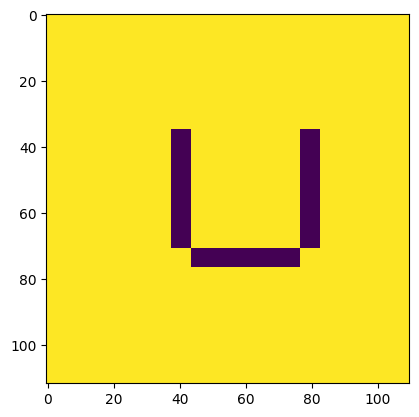

In [76]:
test_img_path="J:/MY-PROJECTS/My python projects/visa/test_chars/8.png"

test_img=cv2.imread(test_img_path)
test_img=cv2.resize(test_img,(resized_w,resized_h))
test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img=cv2.threshold(test_img, 128, 255,  cv2.THRESH_BINARY)[1]
test_img=test_img.reshape((test_img.shape[0],test_img.shape[1],1))
test_img=test_img/255
test_img=np.array([test_img])
plt.imshow(test_img[0])
print(test_img.shape)
p=model.predict(test_img)[0]
p=np.argmax(p)
p=le.inverse_transform([p])
print(p)